In [76]:
VID_IDX = 0

In [72]:
import os
import sys
import glob
import numpy as np

from parse import load_ps

import matplotlib.pyplot as plt
from parse import parse_sequence, load_ps
from evaluate import evaluate_pose
import json
import pickle

In [73]:
with open(f"bird_dog_pkls/vid_{VID_IDX}.pkl", 'rb') as f:
    bird_dog_angles = pickle.load(f)
with open(f"bird_dog_pkls/vid_{VID_IDX}_filtered.pkl", 'rb') as f:
    bird_dog_angles_filtered = pickle.load(f)

# For Testing Mid vs Side


In [70]:
side_keys = [key for key in bird_dog_angles.keys() if "side" in key.lower()]
mid_keys = [key for key in bird_dog_angles.keys() if "mid" in key.lower()]

In [74]:
figure_num = 0
for mid_angle, side_angle in zip(mid_keys, side_keys):
    body_part = " ".join(mid_angle.split('_')[:-2])
    plt.figure(figure_num)
    plt.plot(
        range(len(bird_dog_angles[mid_angle])), 
        bird_dog_angles[mid_angle],
        label = 'Mid Angle',
        marker = '.'
    )
    plt.plot(
        range(len(bird_dog_angles[side_angle])), 
        bird_dog_angles[side_angle],
        label = 'Side Angle',
        marker = '.'

    )
    # plt.plot(    
    #     range(len(bird_dog_angles_filtered[angle])), 
    #     bird_dog_angles_filtered[angle],
    #     label = 'filtered',
    #     marker = '.'
    # )
    plt.title(f"Mid vs Side Angle: {body_part}")
    plt.yticks(np.linspace(0, 360, 10))
    plt.legend()
    plt.savefig(f"TestPlots/mid_v_shoulder/{body_part}.png")
    figure_num += 1


# Run all angles

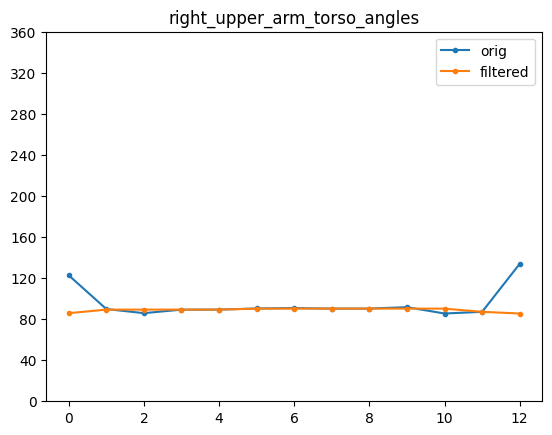

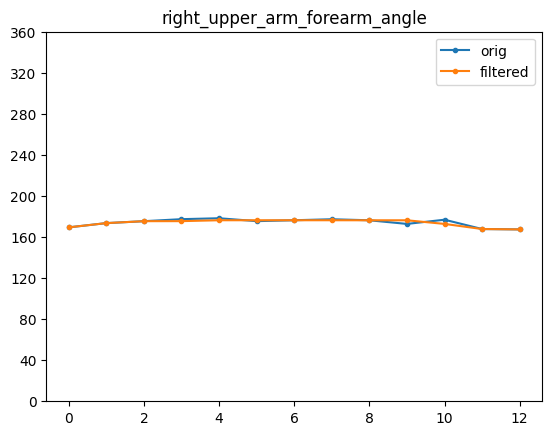

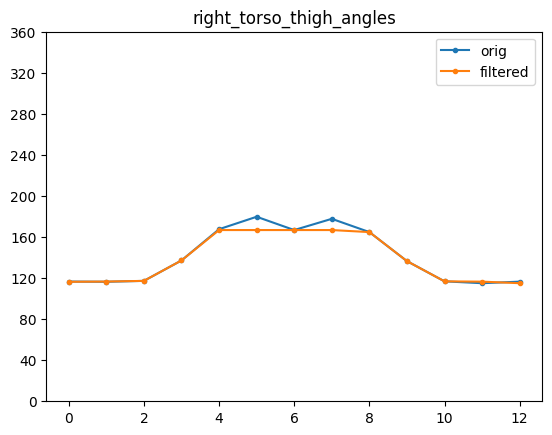

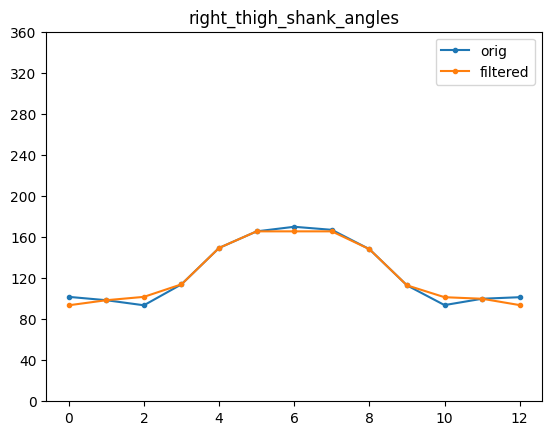

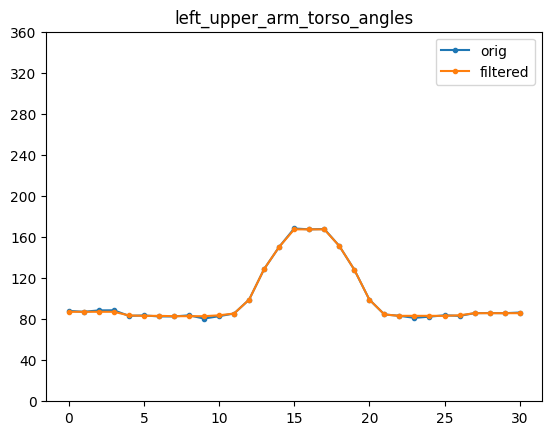

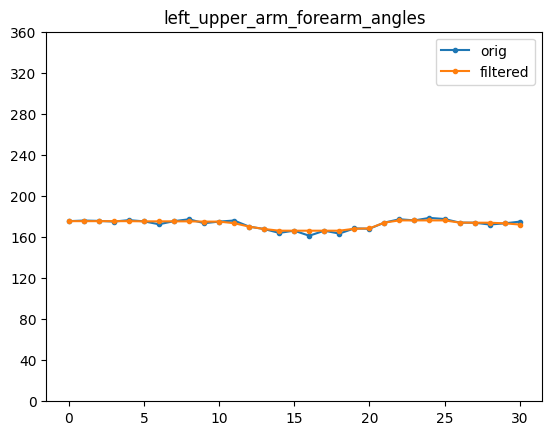

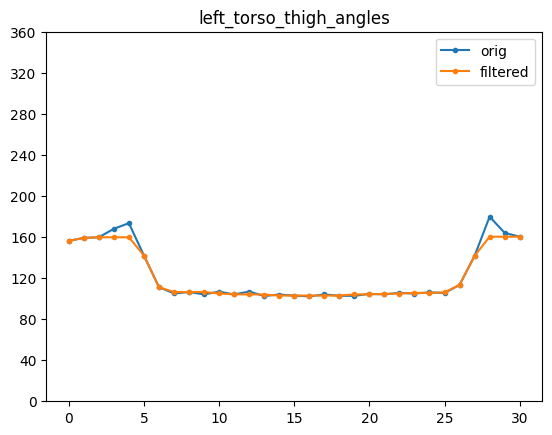

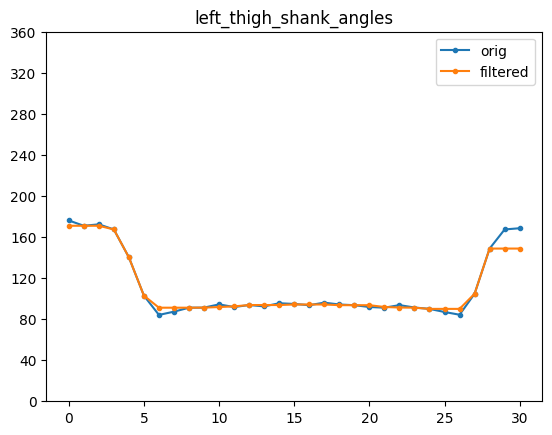

In [75]:
figure_num = 0
try:
    os.mkdir("TestPlots/AllAngles/{}".format(VID_IDX))
except:
    print("Directory Exists")
for key in bird_dog_angles.keys():
    angle = key

    plt.figure(figure_num)
    plt.plot(
        range(len(bird_dog_angles[angle])), 
        bird_dog_angles[angle],
        label = 'orig',
        marker = '.'

    )
    plt.plot(    
        range(len(bird_dog_angles_filtered[angle])), 
        bird_dog_angles_filtered[angle],
        label = 'filtered',
        marker = '.'
    )
    plt.title(key)
    plt.yticks(np.linspace(0, 360, 10))
    plt.legend()
    plt.savefig('TestPlots/AllAngles/{}/{}.png'.format(VID_IDX, key))
    figure_num += 1
# 